In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"Telco-Customer.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,NaN,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

In [5]:
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].mode()[0])

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

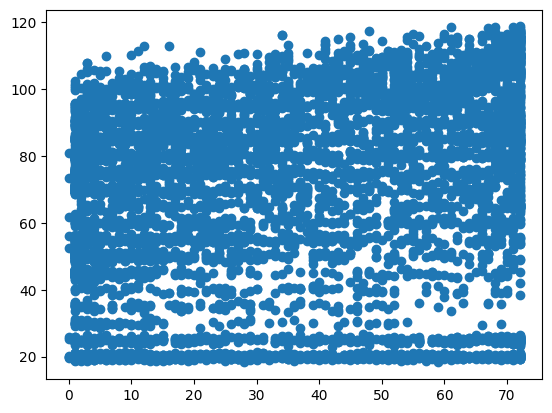

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data["tenure"],data["MonthlyCharges"])
plt.show()

<Axes: xlabel='MonthlyCharges'>

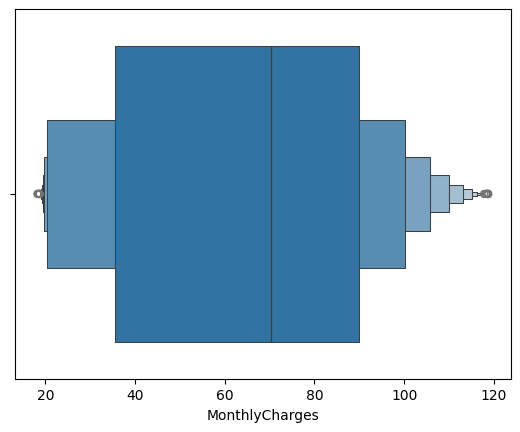

In [9]:
import seaborn as sns
sns.boxenplot(x=data["MonthlyCharges"])


<Axes: xlabel='tenure'>

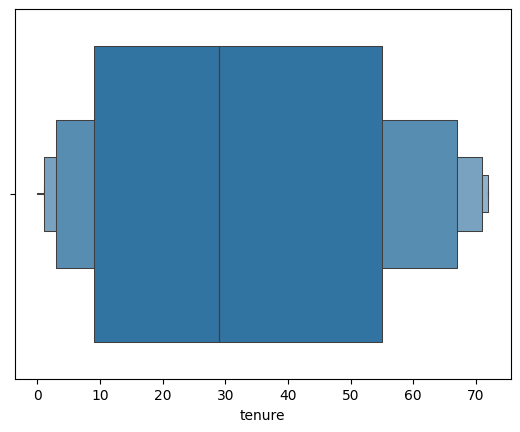

In [19]:
sns.boxenplot(x=data["tenure"])

In [10]:
from scipy.stats import zscore

In [12]:
data["zscore"] = zscore(data["MonthlyCharges"])
outliers = data[data["zscore"].abs() > 3]

In [13]:
data = data[data["zscore"].abs()<=3]

<Axes: xlabel='MonthlyCharges'>

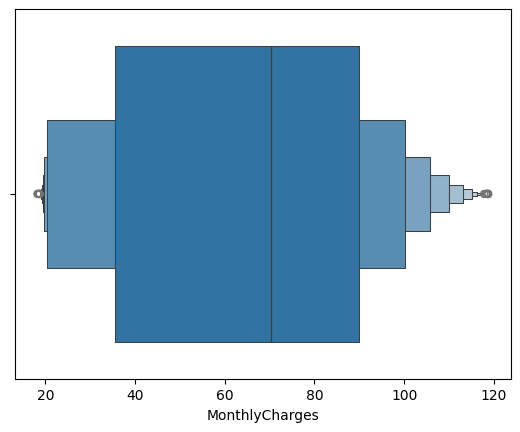

In [26]:
sns.boxenplot(x=data["MonthlyCharges"])

In [14]:
data["gender"].unique()


array(['Female', 'Male'], dtype=object)

In [15]:
data["Partner"].unique()


array(['Yes', 'No'], dtype=object)

In [16]:
data["Contract"].unique()



array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

#ENCODING CATEGORICAL VALUES OF A COLUMN USIN MAP FUNCTION

In [18]:
data['gender'] = data.gender.map({'Female':0,'Male':1})

In [19]:
data['Partner'] = data.Partner.map({'Yes':0,'No':1})

In [20]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,zscore
0,7590-VHVEG,0,0,0,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,,No,-1.160323
1,5575-GNVDE,1,0,1,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,-0.259629
2,3668-QPYBK,1,0,1,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.362660
3,7795-CFOCW,1,0,1,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,-0.746535
4,9237-HQITU,0,0,1,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,0,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0.665992
7039,2234-XADUH,0,0,0,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1.277533
7040,4801-JZAZL,0,0,0,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,-1.168632
7041,8361-LTMKD,1,1,0,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.320338


ENCODING COLUMN WITH MANY UNIQUE VALUES USING FREQUENY (FREQUENY ENCODING)

In [80]:
data['PaymentMethod'].unique()

array([2365, 1612, 1544, 1522])

In [77]:
category_counts = data['PaymentMethod'].value_counts()
data['PaymentMethod'] = data['PaymentMethod'].map(category_counts)

In [78]:
data.head(12)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,zscore
0,7590-VHVEG,0,0,0,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,2365,29.85,,No,-1.160323
1,5575-GNVDE,1,0,1,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,1612,56.95,1889.5,No,-0.259629
2,3668-QPYBK,1,0,1,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,1612,53.85,108.15,Yes,-0.362660
3,7795-CFOCW,1,0,1,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,1544,42.30,1840.75,No,-0.746535
4,9237-HQITU,0,0,1,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,2365,70.70,151.65,Yes,0.197365
5,9305-CDSKC,0,0,1,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,2365,99.65,820.5,Yes,1.159546
6,1452-KIOVK,1,0,1,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,1522,89.10,1949.4,No,0.808907
7,6713-OKOMC,0,0,1,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,1612,29.75,301.9,No,-1.163647
8,7892-POOKP,0,0,0,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,2365,104.80,3046.05,Yes,1.330711
9,6388-TABGU,1,0,1,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,1544,56.15,3487.95,No,-0.286218


TRANSFORMING TENURE

In [21]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [22]:
import numpy as np
bins = [0, 12, 24, 48,72]
labels = ['0-12','12-24','24-48','48-72']
data['TenureGroups'] = pd.cut(data['tenure'],bins=bins,labels=labels)

In [23]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,zscore,TenureGroups
0,7590-VHVEG,0,0,0,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,,No,-1.160323,0-12
1,5575-GNVDE,1,0,1,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,-0.259629,24-48
2,3668-QPYBK,1,0,1,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.362660,0-12
3,7795-CFOCW,1,0,1,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,-0.746535,24-48
4,9237-HQITU,0,0,1,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.197365,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,0,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0.665992,12-24
7039,2234-XADUH,0,0,0,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1.277533,48-72
7040,4801-JZAZL,0,0,0,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,-1.168632,0-12
7041,8361-LTMKD,1,1,0,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.320338,0-12


DATA INTEGRATION

In [24]:
add_data = pd.read_csv(r"C:\Users\Adorable_boy\Desktop\data analytics/plans.csv")

In [25]:
add_data

,InternetService,bundle,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,DSL_plan_1,True,True,True,True,True,True
1,DSL,DSL_plan_2,True,True,True,True,True,False
2,DSL,DSL_plan_3,True,True,True,True,False,True
3,DSL,DSL_plan_4,True,True,True,True,False,False
4,DSL,DSL_plan_5,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...
124,Fiber optic,Fiber optic_plan_61,False,False,False,False,True,True
125,Fiber optic,Fiber optic_plan_62,False,False,False,False,True,False
126,Fiber optic,Fiber optic_plan_63,False,False,False,False,False,True
127,Fiber optic,Fiber optic_plan_64,False,False,False,False,False,False


In [27]:
add_data = add_data.drop(columns=["InternetService"])

In [28]:
add_data

,bundle,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL_plan_1,True,True,True,True,True,True
1,DSL_plan_2,True,True,True,True,True,False
2,DSL_plan_3,True,True,True,True,False,True
3,DSL_plan_4,True,True,True,True,False,False
4,DSL_plan_5,True,True,True,False,True,True
...,...,...,...,...,...,...,...
124,Fiber optic_plan_61,False,False,False,False,True,True
125,Fiber optic_plan_62,False,False,False,False,True,False
126,Fiber optic_plan_63,False,False,False,False,False,True
127,Fiber optic_plan_64,False,False,False,False,False,False
